In [ ]:
import tensorflow as tf
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import seaborn as sns
import cv2

In [ ]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Feature engineering

In [ ]:
Domain_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/MLDOMAIN_MCLS2.csv')
Domain_data.drop(["Unnamed: 0"], axis=1, inplace=True)
Domain_data.head()

,domain_name,dga_family,domain,length,entropy,first_Digit_Index,H_entropy,vowel_consonant_ratio,vowel_character_ratio,consonant_character_ratio,level_no,alexa_grams,words_grams
0,odqzesdvd.info,nymaim,odqzesdvd,9,2.641604,0,3.324863,0.444444,0.285714,0.642857,2,8.618689,10.200253
1,mcrwnxdzu.info,nymaim,mcrwnxdzu,9,3.169925,0,3.664498,0.300000,0.214286,0.714286,2,5.331953,4.442651
2,poxrscvfoy.biz,nymaim,poxrscvfoy,10,3.121928,0,3.664498,0.300000,0.214286,0.714286,2,9.758886,11.231941
3,dupzwi.info,nymaim,dupzwi,6,2.584963,0,3.277613,0.666667,0.363636,0.545455,2,3.861893,7.928046
4,pgldibr.com,nymaim,pgldibr,7,2.807355,0,3.459432,0.250000,0.181818,0.727273,2,12.146719,20.785039


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create label encoder object
labels = LabelEncoder()

# Convert continous y values to categorical
Domain_data['family_label'] = labels.fit_transform(Domain_data['dga_family'])

In [ ]:
Domain_data.head()

,domain_name,dga_family,domain,length,entropy,first_Digit_Index,H_entropy,vowel_consonant_ratio,vowel_character_ratio,consonant_character_ratio,level_no,alexa_grams,words_grams,family_label
0,odqzesdvd.info,nymaim,odqzesdvd,9,2.641604,0,3.324863,0.444444,0.285714,0.642857,2,8.618689,10.200253,32
1,mcrwnxdzu.info,nymaim,mcrwnxdzu,9,3.169925,0,3.664498,0.300000,0.214286,0.714286,2,5.331953,4.442651,32
2,poxrscvfoy.biz,nymaim,poxrscvfoy,10,3.121928,0,3.664498,0.300000,0.214286,0.714286,2,9.758886,11.231941,32
3,dupzwi.info,nymaim,dupzwi,6,2.584963,0,3.277613,0.666667,0.363636,0.545455,2,3.861893,7.928046,32
4,pgldibr.com,nymaim,pgldibr,7,2.807355,0,3.459432,0.250000,0.181818,0.727273,2,12.146719,20.785039,32


In [ ]:
Domain_data.shape

(2076638, 14)

In [ ]:
X= Domain_data.drop(["dga_family", "domain_name", "domain","family_label"], axis=1)
y = Domain_data["family_label"]

Class=32, n=333 (0.016%)
Class=19, n=12000 (0.578%)
Class=23, n=1158 (0.056%)
Class=47, n=4256 (0.205%)
Class=8, n=492 (0.024%)
Class=38, n=199 (0.010%)
Class=37, n=800 (0.039%)
Class=2, n=104 (0.005%)
Class=24, n=1 (0.000%)
Class=39, n=2000 (0.096%)
Class=30, n=8190 (0.394%)
Class=10, n=1000 (0.048%)
Class=35, n=100 (0.005%)
Class=41, n=11160 (0.537%)
Class=27, n=8560 (0.412%)
Class=46, n=2298 (0.111%)
Class=26, n=1 (0.000%)
Class=54, n=100 (0.005%)
Class=51, n=20 (0.001%)
Class=7, n=1000 (0.048%)
Class=55, n=9733 (0.469%)
Class=13, n=500540 (24.103%)
Class=25, n=908 (0.044%)
Class=5, n=2 (0.000%)
Class=34, n=168 (0.008%)
Class=56, n=1 (0.000%)
Class=6, n=1 (0.000%)
Class=50, n=32 (0.002%)
Class=12, n=1000 (0.048%)
Class=28, n=10047 (0.484%)
Class=4, n=1000 (0.048%)
Class=1, n=16 (0.001%)
Class=16, n=29999 (1.445%)
Class=9, n=11 (0.001%)
Class=0, n=27 (0.001%)
Class=52, n=510 (0.025%)
Class=17, n=298 (0.014%)
Class=18, n=299 (0.014%)
Class=3, n=469896 (22.628%)
Class=49, n=93707 (4.51

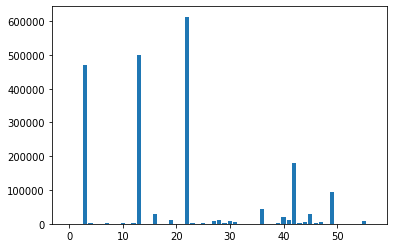

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#minmum_classes = [0,4,6,8,10,11,15,17,18,21,23,24,25,26,32,33,34,35,37,38,48,50,51,53,54]
strategy = {21:10383,46:10385,30:10385, 14:10385, 6:10363, 24:10383, 15:10353, 33:10583, 20:10386, 53:10383, 48:10283, 11:10393, 18:10383, 17:10384, 52:10385,0:10383,9:10183,4:10483,12:10389,1:10388,50:10387,6:10386,56:10385,34:10384,5:10383,25:10283,7:10183,51:10383,54:10483, 26:10383,35:10373,10:10983, 39:10383, 24:10483, 2:10383,37:10683,38:10383,8:10380, 23:10387,32:10383}
smote_on_1 = 1661 
#for i in minmum_classes:
ovrsmt = RandomOverSampler(sampling_strategy=strategy)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
udrsmt = RandomUnderSampler(sampling_strategy={22: 415327,13:373795,42:103832})

In [ ]:
from imblearn.pipeline import Pipeline
steps = [('o', ovrsmt), ('u', udrsmt)]
pipeline = Pipeline(steps=steps)

In [ ]:
X, y = pipeline.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

Class=42, n=82951 (5.067%)
Class=28, n=8105 (0.495%)
Class=13, n=299214 (18.276%)
Class=3, n=375635 (22.943%)
Class=55, n=7774 (0.475%)
Class=20, n=8337 (0.509%)
Class=22, n=332281 (20.295%)
Class=37, n=8490 (0.519%)
Class=38, n=8301 (0.507%)
Class=49, n=74978 (4.580%)
Class=10, n=8779 (0.536%)
Class=7, n=8113 (0.496%)
Class=25, n=8242 (0.503%)
Class=0, n=8292 (0.506%)
Class=35, n=8269 (0.505%)
Class=41, n=8855 (0.541%)
Class=33, n=8479 (0.518%)
Class=16, n=24021 (1.467%)
Class=47, n=3417 (0.209%)
Class=36, n=35782 (2.186%)
Class=11, n=8295 (0.507%)
Class=5, n=8289 (0.506%)
Class=17, n=8302 (0.507%)
Class=31, n=4250 (0.260%)
Class=50, n=8272 (0.505%)
Class=34, n=8325 (0.508%)
Class=21, n=8293 (0.507%)
Class=40, n=15724 (0.960%)
Class=4, n=8413 (0.514%)
Class=46, n=8314 (0.508%)
Class=48, n=8270 (0.505%)
Class=1, n=8331 (0.509%)
Class=45, n=22523 (1.376%)
Class=39, n=8243 (0.503%)
Class=51, n=8288 (0.506%)
Class=26, n=8348 (0.510%)
Class=44, n=4845 (0.296%)
Class=56, n=8312 (0.508%)
Cla

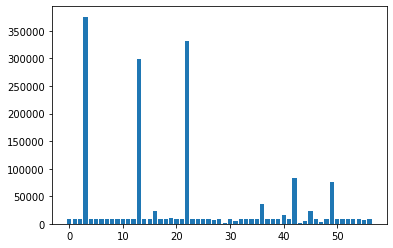

In [ ]:
from matplotlib import pyplot
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 100
rf_classifier = RandomForestClassifier(n_estimators=num_trees, oob_score=True)
RFmodel=rf_classifier.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
RFpred = RFmodel.predict(X_test)
print(classification_report(y_test,RFpred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       456
           1       1.00      1.00      1.00       436
           2       1.00      1.00      1.00       407
           3       0.98      0.99      0.99     93904
           4       0.99      0.74      0.85       420
           5       1.00      1.00      1.00       416
           6       1.00      1.00      1.00       393
           7       0.97      0.99      0.98       407
           8       0.83      0.96      0.89       381
           9       1.00      1.00      1.00       420
          10       0.85      0.77      0.81       427
          11       0.87      0.90      0.89       427
          12       0.99      1.00      1.00       418
          13       1.00      1.00      1.00     95424
          14       0.97      1.00      0.99       411
          15       0.93      1.00      0.96       407
          16       0.89      0.95      0.92      6065
          17       0.87    

In [ ]:
print('accuracy on the train set: ', accuracy_score(RFmodel.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, RFpred))

accuracy on the train set:  0.9998507669190739
accuracy on the test set:  0.9655519922278102


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_RFmodel.sav'
pickle.dump(RFmodel, open(filename, 'wb'))

### AdaBoost Classification


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ABmodel = AdaBoostClassifier(n_estimators=100)


In [ ]:
ABmodel.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
y_true, y_pred = y_test, ABmodel.predict(X_test)

In [ ]:
 from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
 print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       456
           1       0.00      0.00      0.00       436
           2       0.00      0.00      0.00       407
           3       0.38      0.90      0.54     93904
           4       0.00      0.00      0.00       420
           5       0.00      0.00      0.00       416
           6       0.00      0.00      0.00       393
           7       0.00      0.00      0.00       407
           8       0.00      0.00      0.00       381
           9       0.00      0.00      0.00       420
          10       0.00      0.00      0.00       427
          11       0.00      0.00      0.00       427
          12       0.00      0.00      0.00       418
          13       0.00      0.00      0.00     95424
          14       0.00      0.00      0.00       411
          15       0.00      0.00      0.00       407
          16       0.00      0.00      0.00      6065
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy on the train set: ', accuracy_score(ABmodel.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, y_pred))

accuracy on the train set:  0.42794549548705874
accuracy on the test set:  0.42821237218542085


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_ABmodel.sav'
pickle.dump(ABmodel, open(filename, 'wb'))

## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=100)
XGBmodel=xgb_classifier.fit(X_train, y_train)


In [ ]:
XGBpred = XGBmodel.predict(X_test)
print(classification_report(y_test,XGBpred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      1.00      0.88       456
           1       0.98      1.00      0.99       436
           2       0.99      0.94      0.97       407
           3       0.94      0.97      0.95     93904
           4       0.00      0.00      0.00       420
           5       1.00      1.00      1.00       416
           6       1.00      1.00      1.00       393
           7       0.94      0.97      0.96       407
           8       0.00      0.00      0.00       381
           9       0.95      1.00      0.98       420
          10       0.95      0.05      0.09       427
          11       0.00      0.00      0.00       427
          12       1.00      1.00      1.00       418
          13       0.98      1.00      0.99     95424
          14       0.95      0.93      0.94       411
          15       0.67      0.37      0.48       407
          16       0.83      0.97      0.89      6065
          17       0.39    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('accuracy on the train set: ', accuracy_score(XGBmodel.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, XGBpred))

accuracy on the train set:  0.927141630652354
accuracy on the test set:  0.9261521135474391


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_XGBmodel.sav'
pickle.dump(XGBmodel, open(filename, 'wb'))

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
DTmodel=dt_classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
DTpred = DTmodel.predict(X_test)
print(classification_report(y_test,DTpred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       1.00      1.00      1.00       436
           2       1.00      1.00      1.00       407
           3       0.98      0.98      0.98     93904
           4       0.58      0.75      0.65       420
           5       1.00      1.00      1.00       416
           6       1.00      1.00      1.00       393
           7       0.96      0.99      0.98       407
           8       0.74      0.96      0.84       381
           9       1.00      1.00      1.00       420
          10       0.61      0.77      0.68       427
          11       0.66      0.90      0.76       427
          12       1.00      1.00      1.00       418
          13       1.00      1.00      1.00     95424
          14       0.98      1.00      0.99       411
          15       0.90      1.00      0.95       407
          16       0.90      0.89      0.90      6065
          17       0.85    

In [ ]:
print('accuracy on the train set: ', accuracy_score(DTmodel.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, DTpred))

accuracy on the train set:  0.9998676840294624
accuracy on the test set:  0.9497272725075704


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_DTmodel.sav'
pickle.dump(DTmodel, open(filename, 'wb'))

## Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et_classifier = ExtraTreesClassifier()
ETmodel=et_classifier.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import classification_report
ETpred = ETmodel.predict(X_test)
print(classification_report(y_test,ETpred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.50      1.00      0.67         1
           2       0.90      0.95      0.92        19
           3       1.00      1.00      1.00      3090
           4       0.00      0.00      0.00       218
           7       0.99      0.97      0.98       192
           8       0.15      0.09      0.11        96
          10       0.25      0.12      0.16       196
          11       1.00      1.00      1.00       222
          12       1.00      1.00      1.00    100444
          13       0.91      0.98      0.94      5907
          14       0.17      0.02      0.03        58
          15       0.53      0.46      0.49        57
          16       1.00      0.99      1.00      2379
          17       0.99      1.00      0.99    122358
          18       0.12      0.03      0.04       236
          20       0.00      0.00      0.00         9
          22       0.80    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_DTmodel.sav'
pickle.dump(ETmodel, open(filename, 'wb'))

## Bagged Decision Tree Classifier

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier()
num_trees = 100
BDTmodel = BaggingClassifier(base_estimator=cart, n_estimators=num_trees).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
BDTpred = BDTmodel.predict(X_test)
print(classification_report(y_test,BDTpred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       442
           1       1.00      1.00      1.00       421
           2       1.00      1.00      1.00       441
           3       0.98      0.99      0.99     94084
           4       0.94      0.80      0.87       398
           5       1.00      1.00      1.00       398
           6       1.00      1.00      1.00       399
           7       0.98      1.00      0.99       436
           8       0.85      0.93      0.88       389
           9       1.00      1.00      1.00       410
          10       0.83      0.81      0.82       422
          11       0.87      0.90      0.88       431
          12       1.00      1.00      1.00       405
          13       1.00      1.00      1.00     95583
          14       0.98      1.00      0.99       410
          15       0.92      1.00      0.96       381
          16       0.90      0.95      0.92      5995
          17       0.83    

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
print('accuracy on the train set: ', accuracy_score(BDTmodel.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, BDTpred))

accuracy on the train set:  0.9998404958163382
accuracy on the test set:  0.9645538845240138


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_BDTmodel.sav'
pickle.dump(BDTmodel, open(filename, 'wb'))

## Voting ensemble 

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('rf', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = XGBClassifier()
estimators.append(('et', model3))

# create the ensemble model
VTensemble = VotingClassifier(estimators,voting='soft').fit(X_train, y_train)

In [ ]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report
VTpred = VTensemble.predict(X_test)
print(classification_report(y_test, VTpred))

In [ ]:
print('accuracy on the train set: ', accuracy_score(y_train, VTensemble.predict(X_train)))
print('accuracy on the test set: ', accuracy_score(y_test, VTpred))

precision on the test set:  0.9865676231166352
accuracy on the test set:  0.9904357543722265


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_VTensemble.sav'
pickle.dump(VTensemble, open(filename, 'wb'))

### Stacking ensemble

In [ ]:
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('rf', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = ExtraTreesClassifier()
estimators.append(('et', model3))

# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
STensemble = StackingClassifier(estimators=estimators,  final_estimator=level1).fit(X_train, y_train)

In [ ]:
print('accuracy on the train set: ', accuracy_score(STensemble.predict(X_train), y_train))

In [ ]:
STpred = STensemble.predict(X_test)
print(classification_report(y_test, STpred))

In [ ]:
print('accuracy on the train set: ', accuracy_score(STensemble.predict(X_train), y_train))
print('accuracy on the test set: ', accuracy_score(y_test, STpred))

precision on the test set:  0.9874852075802033
accuracy on the test set:  0.9905336400417646


In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/MCL_UNTSM_STensemble.sav'
pickle.dump(STensemble, open(filename, 'wb'))